In [1]:
# Let's import some utilities and configure our notebook
%matplotlib inline
from simone import staircases
import os.path as op
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial
from itertools import product

In [2]:
# First thing first, let's just load the data
subjects_df, colors_df, trials_df, exps_df = staircases()

# Usually you only need to work witht exps_df.
# exps_df contains the experiment data arranged one "experiment" per row
# A experiment is a full staircase
# The staircase + responses are in their own dataframe in the column "series"

In [3]:
# What is in store?
subjects_df.head(5)

,omit,exp_start,age,gender,education,vision
subject_id,,,,,,
0,True,NaT,NaN,None,None,None
1,True,2016-07-08 17:00:00,25.0,F,L,C
2,True,2016-07-08 18:45:00,35.0,F,A,C
3,False,2016-07-09 10:00:00,33.0,F,A,C
4,False,2016-07-09 11:00:00,41.0,M,N,N


In [4]:
colors_df.head(5)

,omit,exp_start,age,gender,education,vision
subject_id,,,,,,
0,True,NaT,NaN,None,None,None
1,True,2016-07-08 17:00:00,25.0,F,L,C
2,True,2016-07-08 18:45:00,35.0,F,A,C
3,False,2016-07-09 10:00:00,33.0,F,A,C
4,False,2016-07-09 11:00:00,41.0,M,N,N


In [5]:
trials_df.head(5)

,participant,reversal_method,staircase,staircase_repetition,step_index,color1,color2,pair_count,chromatic_first,achromatic,chromatic,response,chromatic_brighter,reversal,measured_l_achromatic,measured_a_achromatic,measured_b_achromatic,measured_l_chromatic,measured_a_chromatic,measured_b_chromatic
0,0,double-reversals,C1-M,0,0,C1,M08,2,True,M08,C1,C1,True,False,54.489684,3.804252,1.501129,64.26545,-7.919738,-13.379962
1,0,double-reversals,C1-M,0,1,C1,M12,2,True,M12,C1,M12,False,True,57.687461,2.831082,2.438558,64.26545,-7.919738,-13.379962
2,0,double-reversals,C1-M,0,2,C1,M12,3,True,M12,C1,C1,True,True,57.687461,2.831082,2.438558,64.26545,-7.919738,-13.379962
3,0,double-reversals,C1-M,0,3,C1,M16,2,True,M16,C1,M16,False,True,61.678725,1.959511,2.607403,64.26545,-7.919738,-13.379962
4,0,double-reversals,C1-M,0,4,C1,M16,3,True,M16,C1,M16,False,False,61.678725,1.959511,2.607403,64.26545,-7.919738,-13.379962


In [6]:
exps_df.head(5)

,participant,staircase,staircase_repetition,reversal_method,omit,exp_start,age,gender,education,vision,chromatic,chromatic_first,series
0,0,C1-M,0,double-reversals,True,NaT,NaN,None,None,None,C1,True,step_index color1 color2 pair_count chrom...
1,0,C1-M,0,simple-reversals,True,NaT,NaN,None,None,None,C1,True,step_index color1 color2 pair_count chrom...
2,0,C1-M,1,double-reversals,True,NaT,NaN,None,None,None,C1,True,step_index color1 color2 pair_count chrom...
3,0,C1-M,1,simple-reversals,True,NaT,NaN,None,None,None,C1,True,step_index color1 color2 pair_count chrom...
4,0,C2-M,0,double-reversals,True,NaT,NaN,None,None,None,C2,True,step_index color1 color2 pair_count chrom...


In [7]:
# Let's summarise the staircases by luminance difference of last 3 reversals
def last_mean(df, last=3, do_raise=False):
    if df.reversal.sum() < last:
        if do_raise:
            raise Exception('There are not enough reversals in the experiment (%d < %d)' %
                            (df.reversal.sum(), last))
        return np.nan
    achromatic_l = df[df.reversal].measured_l_achromatic.values[-last:].mean()
    return achromatic_l

def diff(df, last=3):
    # Find the chromatic luminance; one of many possible ways to query for this...
    assert df.measured_l_chromatic.nunique() == 1
    chromatic_l = df.measured_l_chromatic.unique()[0]
    # Find the last 3 reversals mean
    achromatic_l = last_mean(df, last=last)
    return achromatic_l - chromatic_l

staircases_summaries = []
for last in [1, 2, 3, 4, 5]:
    exps_df['diff%d' % last] = exps_df.series.apply(partial(diff, last=last))
    exps_df['last%d_mean' % last] = exps_df.series.apply(partial(last_mean, last=last))
    staircases_summaries.extend(['diff%d' % last, 'last%d_mean' % last])

# Select only some experiments
exps_df = exps_df.query('not omit and '
                        'reversal_method == "simple-reversals" and '
                        'staircase_repetition in [0, 1]')
label_names = ['age', 'gender', 'education', 'vision', 'chromatic', 'chromatic_first']


In [8]:
# Now we have these staircase summarising columns
exps_df.head(5)

,participant,staircase,staircase_repetition,reversal_method,omit,exp_start,age,gender,education,vision,...,diff1,last1_mean,diff2,last2_mean,diff3,last3_mean,diff4,last4_mean,diff5,last5_mean
48,3,C1-M,0,simple-reversals,False,2016-07-09 10:00:00,33.0,F,A,C,...,1.198299,65.463749,0.142828,64.408278,0.113399,64.378849,-0.561632,63.703818,1.763544,66.028994
49,3,C1-M,1,simple-reversals,False,2016-07-09 10:00:00,33.0,F,A,C,...,1.198299,65.463749,0.142828,64.408278,0.113399,64.378849,-0.561632,63.703818,1.763544,66.028994
50,3,C2-M,0,simple-reversals,False,2016-07-09 10:00:00,33.0,F,A,C,...,-0.400174,63.352807,-6.088308,57.664674,-7.260483,56.492499,-8.389472,55.363509,-7.924682,55.828300
51,3,C2-M,1,simple-reversals,False,2016-07-09 10:00:00,33.0,F,A,C,...,-0.400174,63.352807,-6.088308,57.664674,-7.260483,56.492499,-8.389472,55.363509,-7.924682,55.828300
52,3,C3-M,0,simple-reversals,False,2016-07-09 10:00:00,33.0,F,A,C,...,-15.123019,48.040677,-15.387334,47.776363,-15.299229,47.864468,-15.606945,47.556752,-13.580803,49.582893


Women find the achromatic has more light with less luminance
============================================================

If we do not group by color, it seems that women are in general finding the achromatic provides more light for smaller values of luminance

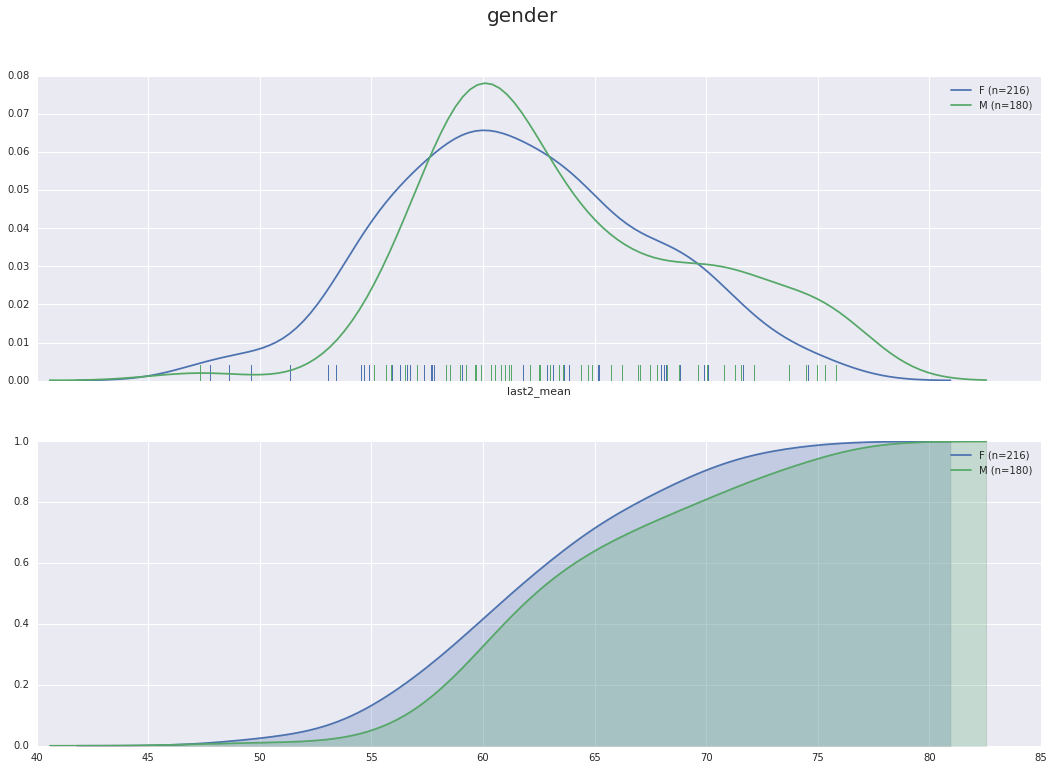

In [9]:
# When are revesals happening, per gender?
label_name = 'gender'
summarizer = 'last2_mean'
fig, (top, bottom) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False,
                                  figsize=(18, 12))
for label, label_df in exps_df.groupby(label_name):
    label = '%s (n=%d)' % (label, len(label_df))
    sns.distplot(label_df[summarizer], label=label, hist=False, rug=True, ax=top)
    sns.kdeplot(label_df[summarizer], label=label, shade=True, cumulative=True, ax=bottom)
plt.suptitle(label_name, fontsize=20)


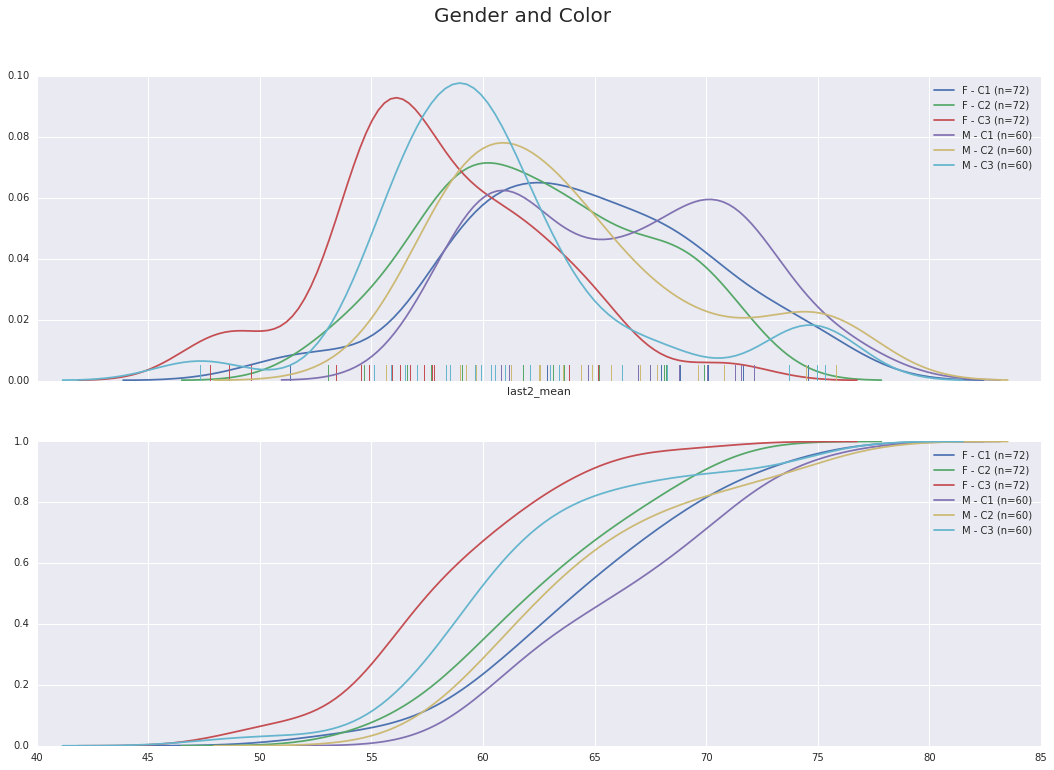

In [10]:
# When are revesals happening, per gender and color?
label_name = 'Gender and Color'
summarizer = 'last2_mean'
fig, (top, bottom) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False,
                                  figsize=(18, 12))
for (gender, color), label_df in exps_df.groupby(['gender', 'chromatic']):
    label = '%s - %s (n=%d)' % (gender, color, len(label_df))
    sns.distplot(label_df[summarizer], label=label, hist=False, rug=True, ax=top)
    sns.kdeplot(label_df[summarizer], label=label, shade=False, cumulative=True, ax=bottom)
plt.suptitle(label_name, fontsize=20)